In [23]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [24]:
ph=1.5574E-4
times=[1,2,3,6,7,9,13,16,21,24,31] 

In [25]:
def islinear(data):
    pca = PCA() # Compute PCA
    pca.fit_transform(data)
    eigenvalues = pca.explained_variance_ # Get eigenvalues
    eigenvalues = np.round(eigenvalues, 7) # Round off eigenvalues
    islin=len([x for x in eigenvalues if x >0])!=2
    print("is linear ",islin)
    return islin 

In [26]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]

In [36]:
from sklearn.metrics import r2_score,mean_squared_error 
def estimateneh(const,valcons):
    plt.scatter(times,const,c='k',s=120)
    plt.ylabel("px(t)*NEH")
    plt.xlabel("Time")
    
#     ========================

    res=[]
    for neh in range(100):
        sum_er=0 
        for i in range(len(times)):
            pxt=[(x/10000) for x in list(range(1,500,1))]
            pxt2=[x for x in pxt if (1-ph-(neh*x)/valcons[i])>0 ]
            diff=[abs(const[i]-neh*x) for x in pxt2]
            try:
                sum_er+=min(diff)
            except:
                sum_er+=float('inf')
        res.append(sum_er)
    
    # best neh val    
    nehval=res.index(min(res))
    
    # compute the points for best neh val
    temp_const=[]
    for i in range(11):
        pxt=[(x/10000) for x in list(range(1,500,1))]
        pxt2=[x for x in pxt if (1-ph-(nehval*x)/valcons[i])>0 ]
        diff=[abs(const[i]-nehval*x) for x in pxt2]
        temp_const.append(pxt2[diff.index(min(diff))]*nehval) 
    
    plt.scatter(times,temp_const,c='r',s=40)    
    plt.show()
    
    corr_matrix = np.corrcoef(const, temp_const)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    r2=r2_score(const, temp_const)
    rmse=(mean_squared_error(const, temp_const))**0.5

    print("**************","RMSE=",rmse,"R square=",r2)
    print(temp_const)
    
    print("\n estimated NEH",nehval)
    plt.scatter(range(100),res,s=10,c='k')
    plt.xlabel("NEH")
    plt.ylabel("Error")
    plt.show()
#     ========================
    
    return nehval


 _AAMLGQEDPPQHGLPR_3 Time 1 ==================================>
pxt*NEH = 0.21 real_NEH= 42 ratio = 0.005 

vals 0.033473866506427016

 _AAMLGQEDPPQHGLPR_3 Time 2 ==================================>
pxt*NEH = 0.631799766 real_NEH= 42 ratio = 0.01504285157142857 

vals 0.3185867306210551

 _AAMLGQEDPPQHGLPR_3 Time 3 ==================================>
pxt*NEH = 0.613599882 real_NEH= 42 ratio = 0.014609521 

vals 0.10612223527427816

 _AAMLGQEDPPQHGLPR_3 Time 6 ==================================>
pxt*NEH = 1.6170085799999998 real_NEH= 42 ratio = 0.03850020428571428 

vals 1.3351066451562674

 _AAMLGQEDPPQHGLPR_3 Time 7 ==================================>
pxt*NEH = 1.57499775 real_NEH= 42 ratio = 0.03749994642857143 

vals 1.3421095466964803

 _AAMLGQEDPPQHGLPR_3 Time 9 ==================================>
pxt*NEH = 1.66530585 real_NEH= 42 ratio = 0.039650139285714286 

vals 1.7986213748006061

 _AAMLGQEDPPQHGLPR_3 Time 13 ==================================>
pxt*NEH = 1.7465094499999998 r

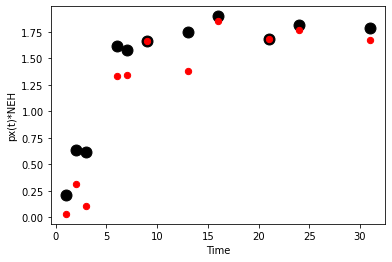

************** RMSE= 0.24839821401288634 R square= 0.8082274787011341
[0.0322, 0.3174, 0.1058, 1.334, 1.3386, 1.6652000000000002, 1.3754, 1.8538000000000001, 1.6836, 1.7663999999999997, 1.6744]

 estimated NEH 46


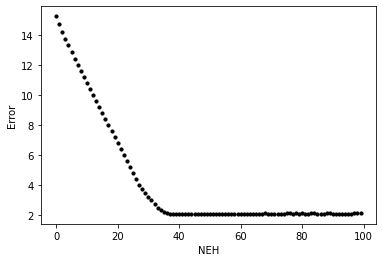


True NEH = 42 	 estimated NEHs median 46


In [41]:
vals=[]
for pep in pept:
    neh_coll=[]
    pxt_neh=[]
    val_col=[]
    for time in times:
        try:
            print(f"\n {pep} Time",time,"==================================>")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AcVDTALENLSTLK_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DAMLENQTPELFQDVNKPK_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DcMLGMEFSGR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DTSFEQHVLLHTGGK_3_{time}_FAS_MOUSE.csv") 
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_EGGFLLVHTVLK_2_{time}_FAS_MOUSE.csv") 
            data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_FAS_MOUSE.csv")

            data["const"]=data.NEH*data.pxt
            data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
            data["new_neh"]=data.const/data.new_pxt
            data=data.sort_values(by=["RMSE"],ascending=True)
            data=data[data.NEH<=data.NH]

#             plt.scatter(data.const,data.RMSE,s=1,c='k')
#             plt.hlines(y=2.5*min(data.RMSE),xmin=min(data.const),xmax=max(data.const),color='r')
#             plt.show()
            
            print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
            print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))
            
            pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
            val_col.append((data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))
            
            
#             if(not islinear(data[["const","RMSE"]])):
            tempdata=data[data.RMSE<2.5*min(data.RMSE)]
            tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
            tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
            tempdata=tempdata.sort_values(by=["pxt_dif"])
#             print(data.T_NEH[0],np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            
        except:
            print("Error",time)

#     print(neh_coll)
    print("\n pxt_neh ",pxt_neh,"\n val_cons ",val_col)
    
#     plt.hist(neh_coll,color='k',bins=50)
#     print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",np.median(neh_coll))
    eneh=estimateneh(pxt_neh,val_col)
    print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",eneh)
#     vals.append([pep,data.T_NEH[0],np.median(neh_coll)])
    vals.append([pep,data.T_NEH[0],eneh])
    
    break

In [39]:
res=pd.DataFrame(vals,columns=["Peptieds","True NEH","Estimated NEH"])
res["diff"]=abs(res["True NEH"]-res["Estimated NEH"])
res.sort_values(by="diff")

,Peptieds,True NEH,Estimated NEH,diff
0,_AAMLGQEDPPQHGLPR_3,42,46,4


In [40]:
print( float(res[["diff"]].mean()),float(res[["diff"]].median()),float(res[["diff"]].std()))

4.0 4.0 nan


In [ ]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_24_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

In [ ]:

ph

In [ ]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [ ]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)

data["test"]= 1-ph-data.pxt == (data.NEH*data.pxt)/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) )

data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]



# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(20)

In [ ]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

from sklearn.decomposition import PCA

pca = PCA() # Compute PCA
pca.fit_transform(  data[["const","RMSE"]])
eigenvalues = pca.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 8) # Round off eigenvalues
eigenvalues

In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(15,6))
plt.scatter(data.const,data.RMSE,s=1)
print(data[data.new_pxt<0].shape)

In [ ]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
tempdata.sort_values(by=["pxt_dif"]).head(25)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(tempdata.const,tempdata.RMSE,s=1)

In [ ]:
np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [ ]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])

In [ ]:
np.array([0.2475, 0.47250000000000003, 0.345, 1.3425, 0.9825, 1.2075, 1.0725, 1.1925000000000001, 1.1775, 1.1175, 1.335])/75

In [ ]:
np.array([[0.16119999999999998, 0.3952, 0.41340000000000005, 0.9229999999999999, 0.9776, 0.9672, 1.0842, 1.183, 1.0608, 1.1258, 1.0972]])/26